In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
files = ['circuits.csv','drivers.csv', 'driver_standings.csv', 'races.csv', 'results.csv', 'status.csv']

data_frames = []

for file in files:
    data_frames.append(pd.read_csv(file))

files

['circuits.csv',
 'drivers.csv',
 'driver_standings.csv',
 'races.csv',
 'results.csv',
 'status.csv']

In [3]:
circuits = pd.read_csv('circuits.csv')
drivers = pd.read_csv('drivers.csv')
driver_standings = pd.read_csv('driver_standings.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
status = pd.read_csv('status.csv')


# Czyszczenie danych

In [4]:
drivers.drop(columns=['url', 'code'], inplace=True)
drivers.to_csv('drivers.csv', index=False)

,driverId,driverRef,number,forename,surname,dob,nationality
0,1,hamilton,44,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,\N,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,6,Nico,Rosberg,1985-06-27,German
3,4,alonso,14,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,\N,Heikki,Kovalainen,1981-10-19,Finnish
...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,Mick,Schumacher,1999-03-22,German
853,855,zhou,24,Guanyu,Zhou,1999-05-30,Chinese
854,856,de_vries,45,Nyck,de Vries,1995-02-06,Dutch
855,857,piastri,81,Oscar,Piastri,2001-04-06,Australian


# EDA - podstawowe statystyki

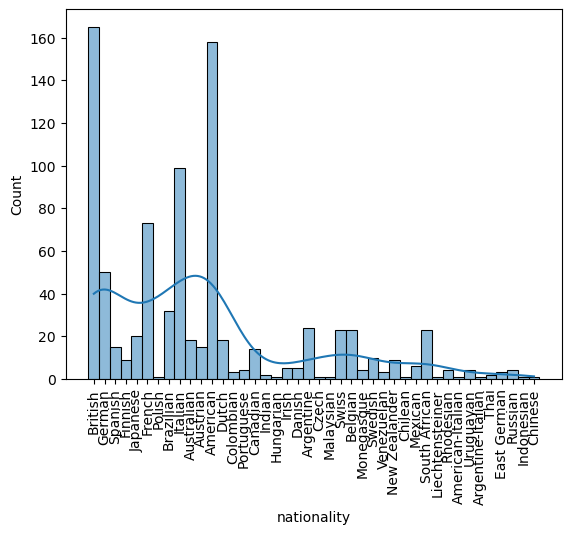

In [5]:
# wizualizacja rozkładu kolumny 'nationality'
sns.histplot(drivers['nationality'], kde=True)
plt.xticks(rotation=90)
plt.show()

In [6]:
drivers['nationality'].value_counts().head(10)


British          165
American         158
Italian           99
French            73
German            50
Brazilian         32
Argentine         24
Belgian           23
Swiss             23
South African     23
Name: nationality, dtype: int64

In [8]:
circuits.drop(columns=['url', 'location', 'circuitRef', 'country', 'lat', 'lng', 'alt'], inplace=True)
races.drop(columns=['url', 'time', 'fp1_date', 'fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time'], inplace=True)
races = races.merge(circuits[['circuitId', 'name']], on='circuitId', how='left', suffixes=('_race', '_circuit'))
races = races[['raceId', 'year', 'round', 'name_race', 'date', 'circuitId', 'name_circuit']]
races.to_csv('races.csv', index=False)

KeyError: "['url', 'location', 'circuitRef', 'country', 'lat', 'lng', 'alt'] not found in axis"

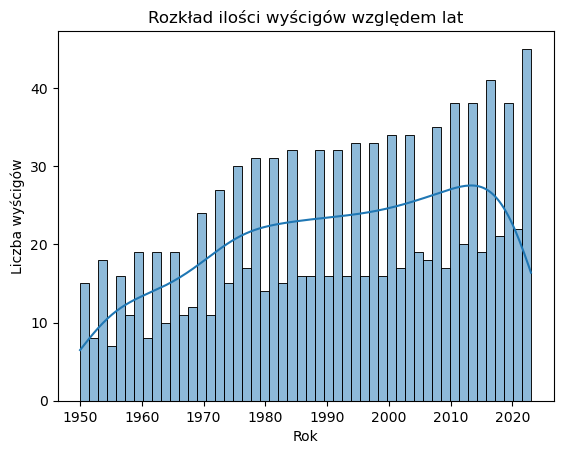

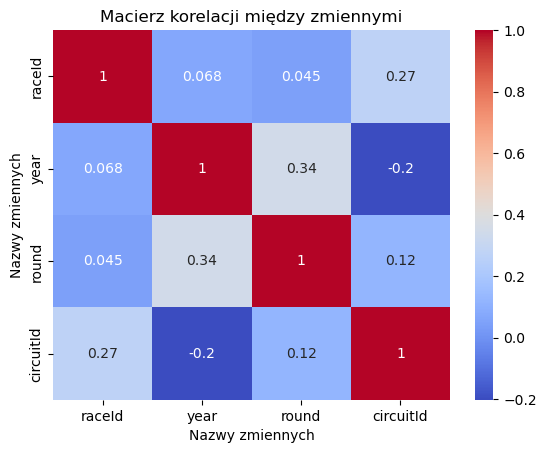

In [20]:
sns.histplot(races['year'], kde=True, bins=50)
plt.title('Rozkład ilości wyścigów względem lat')
plt.xlabel('Rok')
plt.ylabel('Liczba wyścigów')
plt.show()

sns.heatmap(races.corr(), annot=True, cmap='coolwarm')
plt.title('Macierz korelacji między zmiennymi')
plt.xlabel('Nazwy zmiennych')
plt.ylabel('Nazwy zmiennych')
plt.show()

In [18]:
results.drop(columns=['fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed'], inplace=True)
results = results.merge(status, on='statusId') # Połączenie plików
results.to_csv('results.csv', index=False)

KeyError: "['fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed'] not found in axis"

In [11]:
results['positionText'].value_counts().head(10)

R    8805
F    1368
3    1089
4    1089
2    1087
5    1085
1    1082
6    1078
7    1058
8    1030
Name: positionText, dtype: int64

In [14]:
# Zliczenie statusów i wyświetlenie 10 najczęściej występujących
status_counts = results['status'].value_counts().head(10)
status_counts

Finished           7083
+1 Lap             3850
Engine             2011
+2 Laps            1593
Accident           1044
Did not qualify    1025
Collision           833
Gearbox             805
Spun off            792
+3 Laps             731
Name: status, dtype: int64

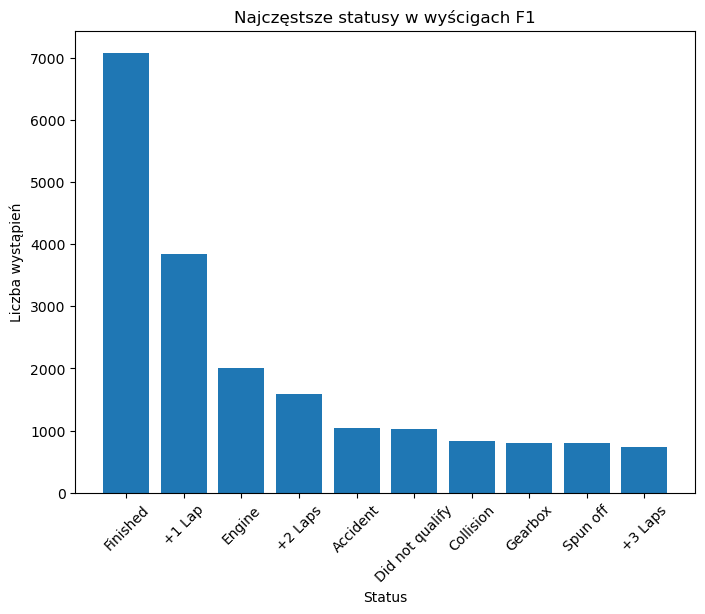

In [15]:
# Stworzenie wykresu słupkowego
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(status_counts.index, status_counts.values)

ax.set_title('Najczęstsze statusy w wyścigach F1')
ax.set_xlabel('Status')
ax.set_ylabel('Liczba wystąpień')
plt.xticks(rotation=45)# Obrócenie etykiet

plt.show()


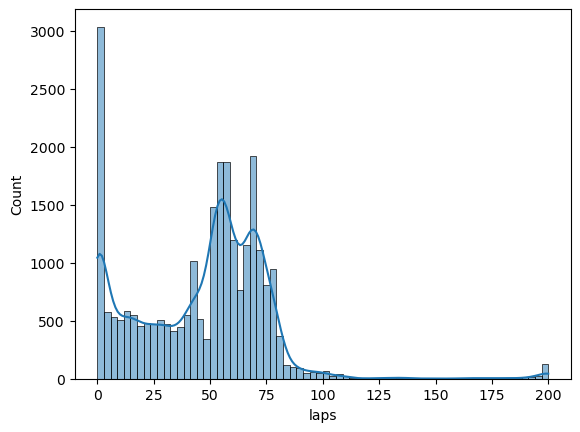

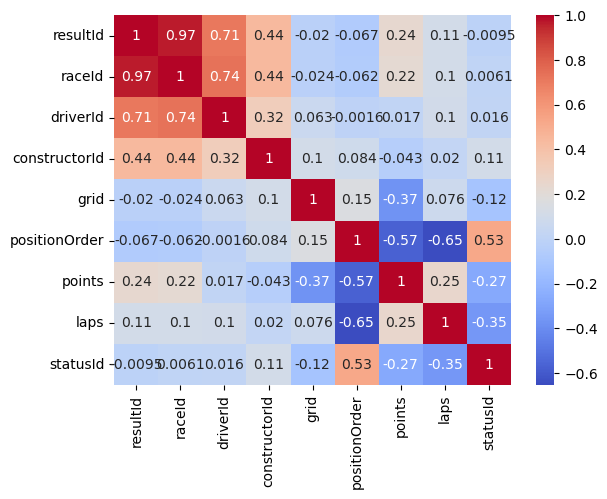

In [27]:
# wizualizacja rozkładu kolumny 'lat'
sns.histplot(results['laps'], kde=True)
plt.show()

# wyświetlenie macierzy korelacji między zmiennymi
sns.heatmap(results.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
driver_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33897,71841,1098,840,0.0,16,16,0
33898,71842,1098,852,0.0,17,17,0
33899,71843,1098,830,0.0,18,18,0
33900,71844,1098,856,0.0,19,19,0


In [22]:

circuits_info = circuits.info()
drivers_info = drivers.info()
driver_stnd_info = driver_standings.info()
races_info = races.info()
results_info = results.info()
status_info = status.info()

# łączenie wyników
result_info = pd.concat([circuits_info, drivers_info, driver_stnd_info, races_info, results_info, status_info]) 

# wyświetlenie wyników
result_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    o

ValueError: All objects passed were None

In [17]:
circuits_dscr = circuits.describe()
drivers_dscr = drivers.describe()
driver_stnd_dscr = driver_standings.describe()
races_dscr = races.describe()
results_dscr = results.describe()
status_dscr = status.describe()

result_describe = pd.concat([circuits_dscr, drivers_dscr, driver_stnd_dscr, races_dscr, results_dscr, status_dscr])

result_describe.round(2)


,circuitId,driverId,driverStandingsId,raceId,points,position,wins,year,round,resultId,constructorId,grid,positionOrder,laps,statusId
count,77.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,23.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,20.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,40.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,59.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,80.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,NaN,857.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,429.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# lista plików w folderze z danymi
files = os.listdir(data_path)

# iteracja po każdym pliku, łączenie i czyszczenie danych
dfs = []
for file in files:
    if file.endswith('.csv'): # tylko pliki CSV
        df = pd.read_csv(os.path.join(data_path, file))
        dfs.append(df)
merged_df = pd.concat(dfs, ignore_index=True)
merged_df.drop_duplicates(inplace=True) # usuwanie duplikatów
merged_df.dropna(inplace=True) # usuwanie brakujących wartości
merged_df.drop(columns=['url', 'location', 'circuitRef', 'country', 'lat', 'lng', 'alt', 'code', 'time',
       'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed' ], inplace=True) # usuwanie niepotrzebnych kolumn


# lista plików w folderze z danymi
files = os.listdir(data)

# iteracja po każdym pliku i czyszczenie danych
for file in files:
    if file.endswith('.csv'): # tylko pliki CSV
        df = pd.read_csv(os.path.join(data, file))
        
        df.drop_duplicates(inplace=True) # usuwanie duplikatów
        df.dropna(inplace=True) # usuwanie brakujących wartości
        df.drop(columns=['url'], inplace=True) # usuwanie kolumny z linkami do wikipedii

        output_file = os.path.join(data, 'cleaned_' + file)  # zapisanie zmodyfikowanej ramki do pliku
        df.to_csv(output_file, index=False)